In [1031]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [1032]:
file_path = r'D:\Data Science Projects\Datasets\Telecom_Customer_Churn.csv'
file_dataset='Telecom_Customer_Churn.csv'

In [1033]:
df=pd.read_csv(file_path)
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
186,4827-USJHP,Male,0,No,No,20,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,51.80,1023.85,No
1838,8058-DMYRU,Male,1,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,4931.8,No
2796,0058-EVZWM,Female,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.80,4959.6,No
1549,4237-RLAQD,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,45.85,Yes
3743,2391-SOORI,Male,0,No,Yes,4,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,49.35,219.65,Yes


In [1034]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [1035]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [1036]:
df['customerID'] = df['customerID'].str.slice(0,-6)
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5004,2067,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
2582,7145,Female,0,No,Yes,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.30,1275.65,No
2662,8348,Male,0,No,No,2,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,49.25,90.35,Yes
6829,8148,Male,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,125,No
1533,8519,Female,0,No,No,14,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,75.35,1025.95,Yes


In [1037]:
df["TotalCharges"]=pd.to_numeric(df.TotalCharges,errors='coerce')
df["customerID"]=pd.to_numeric(df.customerID,errors='coerce')

In [1038]:
df.dtypes

customerID            int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [1039]:
missing_columns=df.columns[df.isnull().any()]
print(missing_columns)

Index(['TotalCharges'], dtype='object')


In [1040]:
missing_count=df['TotalCharges'].isnull().sum()
print(missing_count)

11


In [1041]:
df1=df.dropna(subset='TotalCharges')

In [1042]:
missing_columns=df1.columns[df1.isnull().any()]
print(missing_columns)

Index([], dtype='object')


In [1043]:
df1.dtypes

customerID            int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


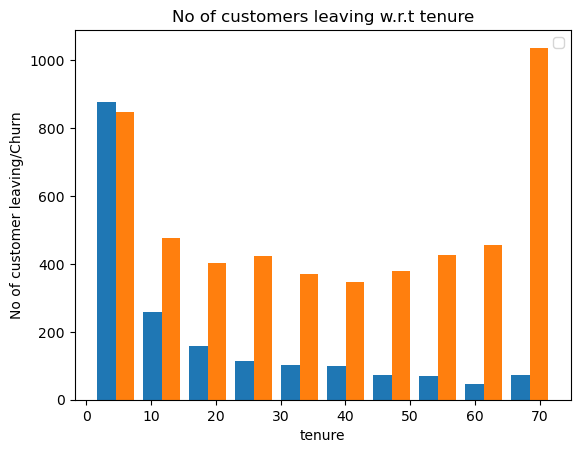

In [1044]:
#Visualization Tenure with Churn
Tenure_Churn_No = df1[df1.Churn=="No"].tenure
Tenure_Churn_Yes = df1[df1.Churn=="Yes"].tenure
plt.xlabel('tenure')
plt.ylabel('No of customer leaving/Churn')
plt.title("No of customers leaving w.r.t tenure")
plt.hist([Tenure_Churn_Yes,Tenure_Churn_No])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


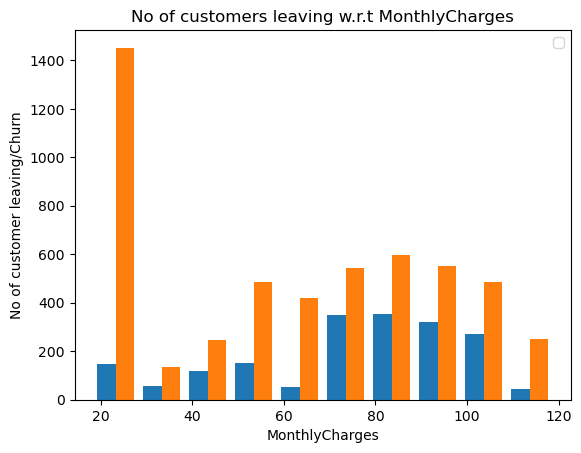

In [1045]:
#Visualization Tenure with Churn
MonthlyCharges_Churn_No = df1[df1.Churn=="No"].MonthlyCharges
MonthlyCharges_Yes = df1[df1.Churn=="Yes"].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('No of customer leaving/Churn')
plt.title("No of customers leaving w.r.t MonthlyCharges")
plt.hist([MonthlyCharges_Yes,MonthlyCharges_Churn_No])
plt.legend()

In [1046]:
def print_unique_values(df1):
 for col in df1:
     if df1[col].dtypes=="object":
      print(f'{col}:{df1[col].unique()}')

In [1047]:
print_unique_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [1048]:
df1.replace("No internet service","No",inplace=True)

C:\Users\raiai\AppData\Local\Temp\ipykernel_10216\3316021580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)


In [1049]:
df1.replace("No phone service","No",inplace=True)

C:\Users\raiai\AppData\Local\Temp\ipykernel_10216\2225408447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [1050]:
print_unique_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [1051]:
Yes_No_Columns=['Partner','Dependents','PhoneService','Churn','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in Yes_No_Columns:
    df1[col].replace({"Yes":1,"No":0},inplace=True)

C:\Users\raiai\AppData\Local\Temp\ipykernel_10216\2182697656.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes":1,"No":0},inplace=True)
C:\Users\raiai\AppData\Local\Temp\ipykernel_10216\2182697656.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({"Yes":1,

In [1052]:
print_unique_values(df1)


gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [1053]:
df1['gender'].replace({'Female':0,'Male':1},inplace=True)

C:\Users\raiai\AppData\Local\Temp\ipykernel_10216\4018057419.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':0,'Male':1},inplace=True)
C:\Users\raiai\AppData\Local\Temp\ipykernel_10216\4018057419.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [1054]:
df1.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3429,7872,0,0,1,1,53,1,0,No,0,...,0,0,0,0,One year,0,Bank transfer (automatic),19.55,1007.90,0
5535,2404,0,0,1,1,55,1,1,DSL,1,...,1,1,1,1,Two year,1,Bank transfer (automatic),85.10,4657.95,0
4922,7839,0,0,1,1,61,1,1,DSL,1,...,0,0,0,0,Month-to-month,0,Electronic check,59.80,3641.50,0
4417,515,1,0,0,1,1,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,70.45,70.45,1
1103,7722,1,0,1,1,54,1,1,Fiber optic,0,...,0,1,1,1,One year,1,Electronic check,105.20,5637.85,0


In [1055]:
df1 =pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])

In [1056]:
df1.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
748,6425,1,0,1,0,48,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
5421,2300,0,0,0,0,38,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
1317,9277,0,0,0,0,3,1,1,0,0,...,False,False,True,True,False,False,False,False,False,True
4325,2700,1,0,0,0,1,1,0,0,0,...,False,False,True,True,False,False,False,True,False,False
1920,4623,1,0,1,0,22,1,0,0,0,...,False,False,True,True,False,False,True,False,False,False


In [1057]:
df1.dtypes

customerID                                   int64
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic    

In [1058]:
columns_to_convert = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
df1[columns_to_convert] = df1[columns_to_convert].astype(int)

In [1059]:
df1.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1597,5327,1,0,1,0,48,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
6862,1273,0,1,0,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1885,7217,1,0,1,1,24,1,0,1,1,...,1,0,0,1,0,0,0,1,0,0
3391,7234,1,0,0,0,4,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1775,2307,1,1,0,0,65,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [1060]:
df1.dtypes

customerID                                   int64
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic    

In [1061]:
#Scaling
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
df1[cols_to_scale]= Scaler.fit_transform(df1[cols_to_scale])

In [1062]:
df1.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4602,1240,0,0,0,0,0.929577,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3914,1755,1,0,0,0,0.535211,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1609,3584,1,0,1,0,0.704225,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
5338,2580,0,0,1,0,0.507042,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1085,4441,0,1,0,0,0.169014,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3735,3489,0,0,1,0,0.014085,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5681,2522,0,1,1,0,0.464789,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
934,4198,0,0,0,0,0.154930,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3600,8623,1,1,1,1,0.704225,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2280,2754,0,1,0,0,0.098592,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [1063]:
#TrainTestSplit
X=df1.drop(columns=['customerID', 'Churn'])
Y=df1['Churn']

In [1064]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [1065]:
X_train.shape

(5625, 26)

In [1066]:
X_test.shape

(1407, 26)

In [1067]:
Y_train.shape

(5625,)

In [1068]:
Y_test.shape

(1407,)

In [1069]:
#ModelDeploymentNueralNetwork Keras/Deep Learning
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=100)

C:\Users\raiai\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7353 - loss: 0.5289
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7865 - loss: 0.4442
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.4106
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.7987 - loss: 0.4253
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4118  
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7945 - loss: 0.4238
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4235  
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8060 - loss: 0.4101
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.4094
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8013 - loss: 0.4181
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8136 - loss: 0.4009
Epoch 12/100
176/176 ━━━━

In [1070]:
model.evaluate(X_test,Y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7855 - loss: 0.4459


[0.43781590461730957, 0.7945984601974487]

In [1071]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.5693886 ],
       [0.23313041],
       [0.21775384],
       [0.04401482],
       [0.67077273]], dtype=float32)

In [1072]:
Y_test[:10]

6787    0
4564    1
3038    0
605     0
1702    1
2670    0
6001    0
234     0
2859    0
5047    0
Name: Churn, dtype: int64

In [1073]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [1074]:
y_pred[:10]

[1, 0, 0, 0, 1, 0, 1, 0, 0, 0]

In [1075]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred,))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1018
           1       0.66      0.52      0.59       389

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [1076]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[914 104]
 [185 204]]


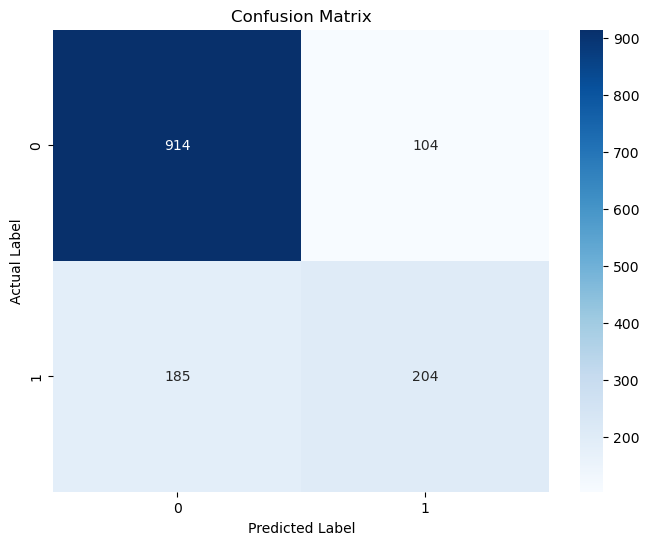

In [1077]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [1106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
features = df1.drop(columns=['customerID', 'Churn'])  # Exclude target and ID
target = df1['Churn']

In [1085]:
scaler2 = StandardScaler()
features_scaled = scaler2.fit_transform(features)

In [1086]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [1087]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1088]:
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.7825159914712153
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [1091]:
df1['predicted_churn'] = model.predict(features)

C:\Users\raiai\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [1093]:
if 'Churn' in df1.columns:
    df1['actual_churn'] = df1['Churn']

In [1097]:
churned_customers = df1[df1['predicted_churn'] == 1]
print(churned_customers[['customerID', 'predicted_churn','actual_churn']])

      customerID  predicted_churn  actual_churn
5           9305                1             1
36          6047                1             1
45          3714                1             0
53          7495                1             1
55          1658                1             1
...          ...              ...           ...
6970        8083                1             1
6993        6583                1             1
7009        7703                1             1
7010         723                1             1
7032        6894                1             1

[529 rows x 3 columns]


In [1104]:
output_directory = r'D:\Data Science Projects\Datasets\customers_churn_predictions.csv'  # Change this to your desired path
output_file = 'customers_churn_predictions.csv'
output_columns = ['customerID', 'actual_churn', 'predicted_churn']

In [1105]:
churned_customers[output_columns].to_csv(f'{output_directory}{output_file}', index=False)